In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [13]:
data = pd.read_csv('./result/result_summary.csv')
data['topk_cluster_size'] = data.topk_cluster_size.apply(ast.literal_eval)
data.head()

,date,n_pts,n_clusters,sil_coef,n_grouped,n_noise,topk_cluster_size
0,2025-03-01,228,14,0.397149,77,151,"[17, 13, 4]"
1,2025-03-02,198,10,0.284516,80,118,"[20, 19, 9]"
2,2025-03-03,500,29,0.044806,386,114,"[16, 11, 8]"
3,2025-03-04,533,24,0.015827,427,106,"[13, 11, 10]"
4,2025-03-05,506,20,0.008247,423,83,"[16, 11, 6]"


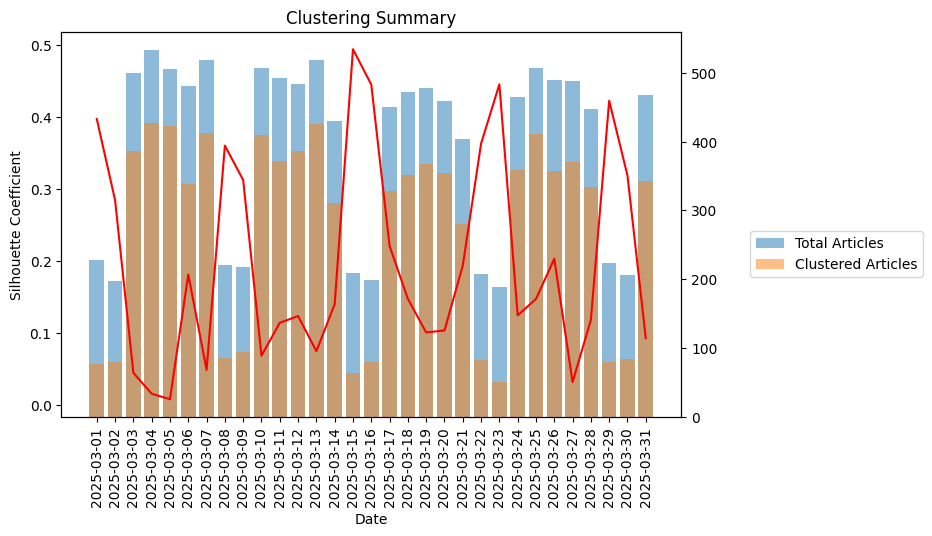

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Clustering Summary')
ax.bar(np.arange(len(data.date.unique())), data.n_pts, label='Total Articles', alpha=0.5)
ax.bar(np.arange(len(data.date.unique())), data.n_grouped, color='tab:orange', label='Clustered Articles', alpha=0.5)
ax.set_xticks(np.arange(len(data.date.unique())), labels=[d for d in data.date.unique()], rotation=90)

ax2 = ax.twinx()
ax2.plot(np.arange(len(data.date.unique())), data.sil_coef, color='red')
ax2.set_ylabel('Silhouette Coefficient')

# flip ylabel and yticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Silhouette Coefficient')

ax.set_xlabel('Date')
ax.legend(bbox_to_anchor=(1.1, 0.5))
plt.show()

In [18]:
print(f"Mean Silhouette Coefficient: {data.sil_coef.mean():.3f}")
print(f"Mean # of Grouped Points: {data.n_grouped.mean():.3f}")
print(f"Mean # of Clusters: {data.n_clusters.mean():.3f}")
print(f"Mean Top k Cluster Size: {np.mean(data.topk_cluster_size.sum()):.3f}")

Mean Silhouette Coefficient: 0.198
Mean # of Grouped Points: 274.903
Mean # of Clusters: 26.774
Mean Top k Cluster Size: 14.677
